# K-MEANS

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [12]:
url = 'https://raw.githubusercontent.com/imbich/Project-Machine-Learning/main/data/data_processed/data_processed.csv'
data = pd.read_csv(url)
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,0.210069,2.490896,-1.823744,0.350082,-0.386404,-0.145586,0.075111,-0.584526,-0.329669,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,-0.294829,-0.167406,-0.554068,0.254153,0.350082,-0.386404,-0.145586,-1.254495,-1.218380,-0.829997,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,-0.294829,-1.111094,2.490896,-1.131112,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.670987,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,-0.294829,0.210069,0.207173,1.177663,0.350082,-0.386404,-0.145586,1.183116,0.954834,-0.329669,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,1.356212,0.965018,-0.554068,-1.592866,-2.856470,-0.386404,-0.145586,1.072315,1.045384,0.670987,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.111094,3.252137,1.177663,0.350082,-0.386404,-0.145586,-1.254495,-1.399481,-0.329669,...,-0.282442,-0.105726,-0.016033,0.187165,0.467631,-0.199441,1.476924,1.137005,-1.789667,2
4420,-0.294829,-1.111094,0.207173,1.177663,0.350082,-0.386404,10.150427,-1.254495,-1.399481,0.670987,...,-0.282442,-0.105726,-0.522682,-0.808050,0.147747,-0.199441,-0.175007,-0.454253,0.889126,0
4421,-0.294829,-1.111094,-0.554068,0.485030,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.670987,...,-0.282442,0.805144,0.237291,-1.139788,0.627573,-0.199441,0.876222,-1.105222,0.347199,0
4422,-0.294829,-1.111094,-0.554068,-0.207602,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.170659,...,-0.282442,-0.561161,-0.522682,0.187165,0.339678,-0.199441,-0.813253,-1.466871,-1.375511,2


In [13]:
X = data.drop('Target', axis = 1)
y = data['Target']

## Tìm k

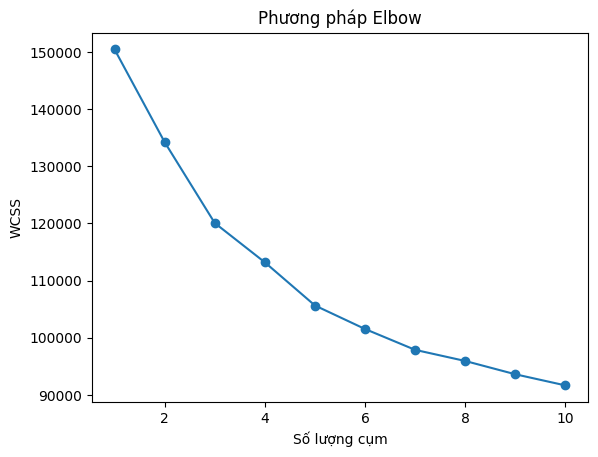

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Phương pháp Elbow')
plt.xlabel('Số lượng cụm')
plt.ylabel('WCSS')
# plt.show()
plt.savefig('find_k.png')

## Huấn luyện mô hình

In [15]:
# Huấn luyện KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)


## Trực quan hóa

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids = pca.transform(kmeans.cluster_centers_)

c:\Users\NGUYEN PHUONG BICH\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


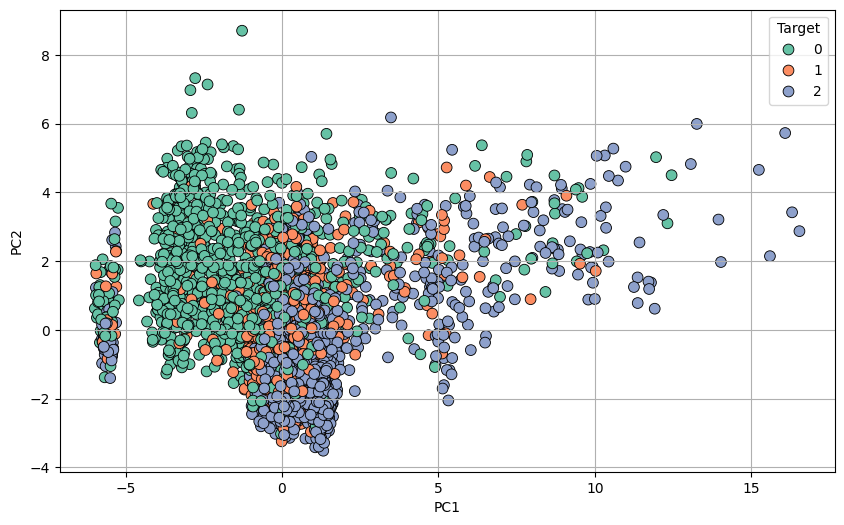

In [17]:
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue=y, palette='Set2', s=60, edgecolor='k')
# plt.title('Scatter Plot theo lớp')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
# plt.show()
plt.savefig('class.png')

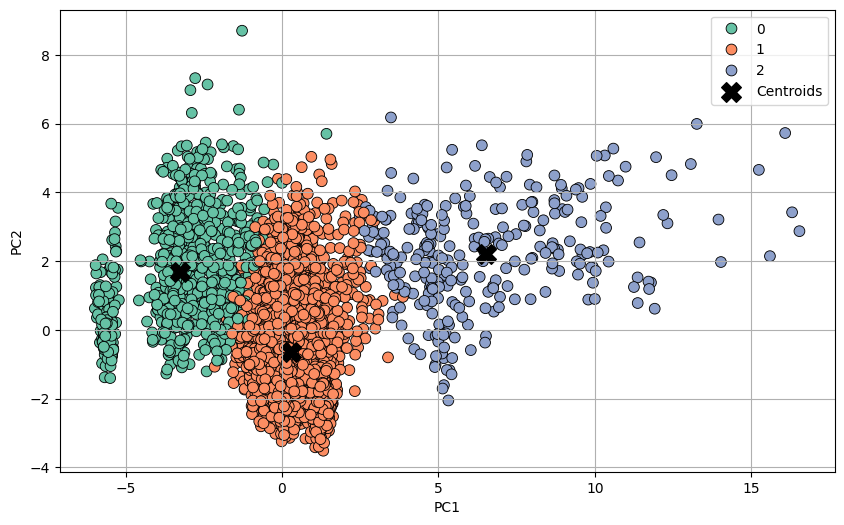

In [18]:

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60, edgecolor='k')

# Vẽ centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')

# plt.title('KMeans clustering với PCA (2 thành phần chính)')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('cluster.png')

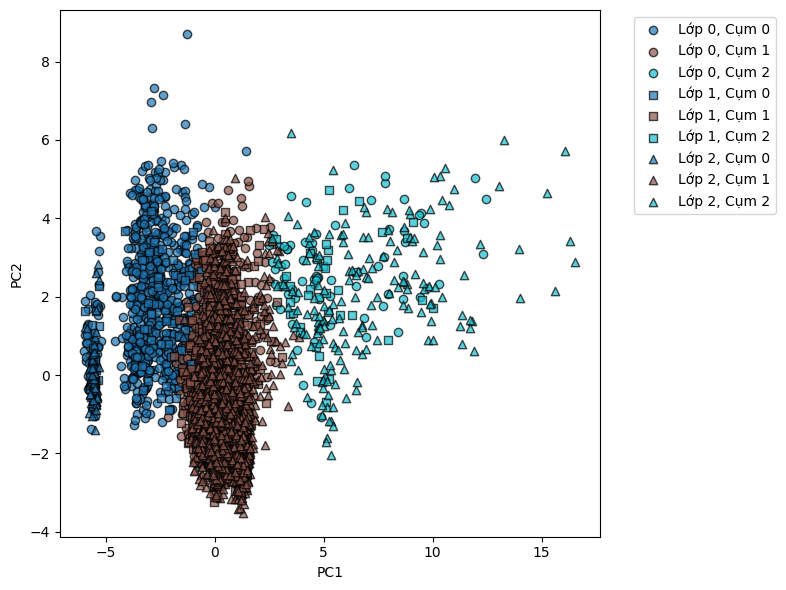

In [19]:
markers = ['o', 's', '^']  # Tuỳ số nhãn
labels_cluster = clusters
unique_labels = np.unique(y)
unique_clusters = np.unique(labels_cluster)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))  # Tạo màu cho từng cụm

plt.figure(figsize=(8, 6))

for i, label in enumerate(unique_labels):
    for j, cluster in enumerate(unique_clusters):
        mask = (y == label) & (labels_cluster == cluster)
        plt.scatter(
            X_pca[mask, 0],
            X_pca[mask, 1],
            color=colors[j],
            marker=markers[i % len(markers)],
            label=f'Lớp {label}, Cụm {cluster}',
            edgecolors='k',  # viền đen cho rõ
            alpha=0.7
        )

# plt.title("Phân cụm (màu) và Nhãn thực tế (hình)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# plt.show()
plt.savefig('cluster_shape_color.png')

## Các chỉ số đánh giá

In [20]:
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score,normalized_mutual_info_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score


print('UNSUPERVISED EVALUTION:')
print('Silhouette Score:', silhouette_score(X, clusters))
print('DBI:', davies_bouldin_score(X, clusters))
print('CH:', calinski_harabasz_score(X, clusters))

print('\nSUPERVISED EVALUTION:')
print('ARI:', adjusted_rand_score(y, clusters))
print('FMI:', fowlkes_mallows_score(y, clusters))
print('NMI:', normalized_mutual_info_score(y, clusters))



UNSUPERVISED EVALUTION:
Silhouette Score: 0.20736781166421228
DBI: 1.9697094479322692
CH: 558.9328760352274

SUPERVISED EVALUTION:
ARI: 0.1614540660591778
FMI: 0.5636799014512515
NMI: 0.1655609284806709
